# Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


### Step 1:
- Import the boston house dataset from `sklearn.datasets`. 

`from sklearn.datasets import load_boston`

`boston = load_boston()`

- Create train and test datasets. 

- Check the data description and familiarize yourself with the data.

In [ ]:
# load_boston is deprecated because of ethical issues.
# from sklearn.datasets import load_boston

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\n", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/tr/xh05sl9s3q171cth46cr9vnw0000gn/T/ipykernel_80290/539921996.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [ ]:
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

,0,1,2,3,4,5,6,7,8,9,10
1,396.90,4.98,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,396.90,9.14,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,392.83,4.03,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,394.63,2.94,33.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,396.90,5.33,36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1003,391.99,9.67,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,396.90,9.08,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,396.90,5.64,23.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,393.45,6.48,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
even_rows = raw_df.iloc[::2].reset_index(drop=True)
odd_rows  = raw_df.iloc[1::2].reset_index(drop=True)


column names:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's


In [26]:
df = pd.concat([even_rows, odd_rows], axis =1).dropna(axis = 1)
df.columns = ['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax', 'pt_ratio', 'b1000', 'lstat','medv']

In [27]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt_ratio,b1000,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
X, y = df.drop(columns = 'medv'), df['medv']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt_ratio,b1000,lstat
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


### Step 2:
Create a scatter plot of each attribute with the mean house price.

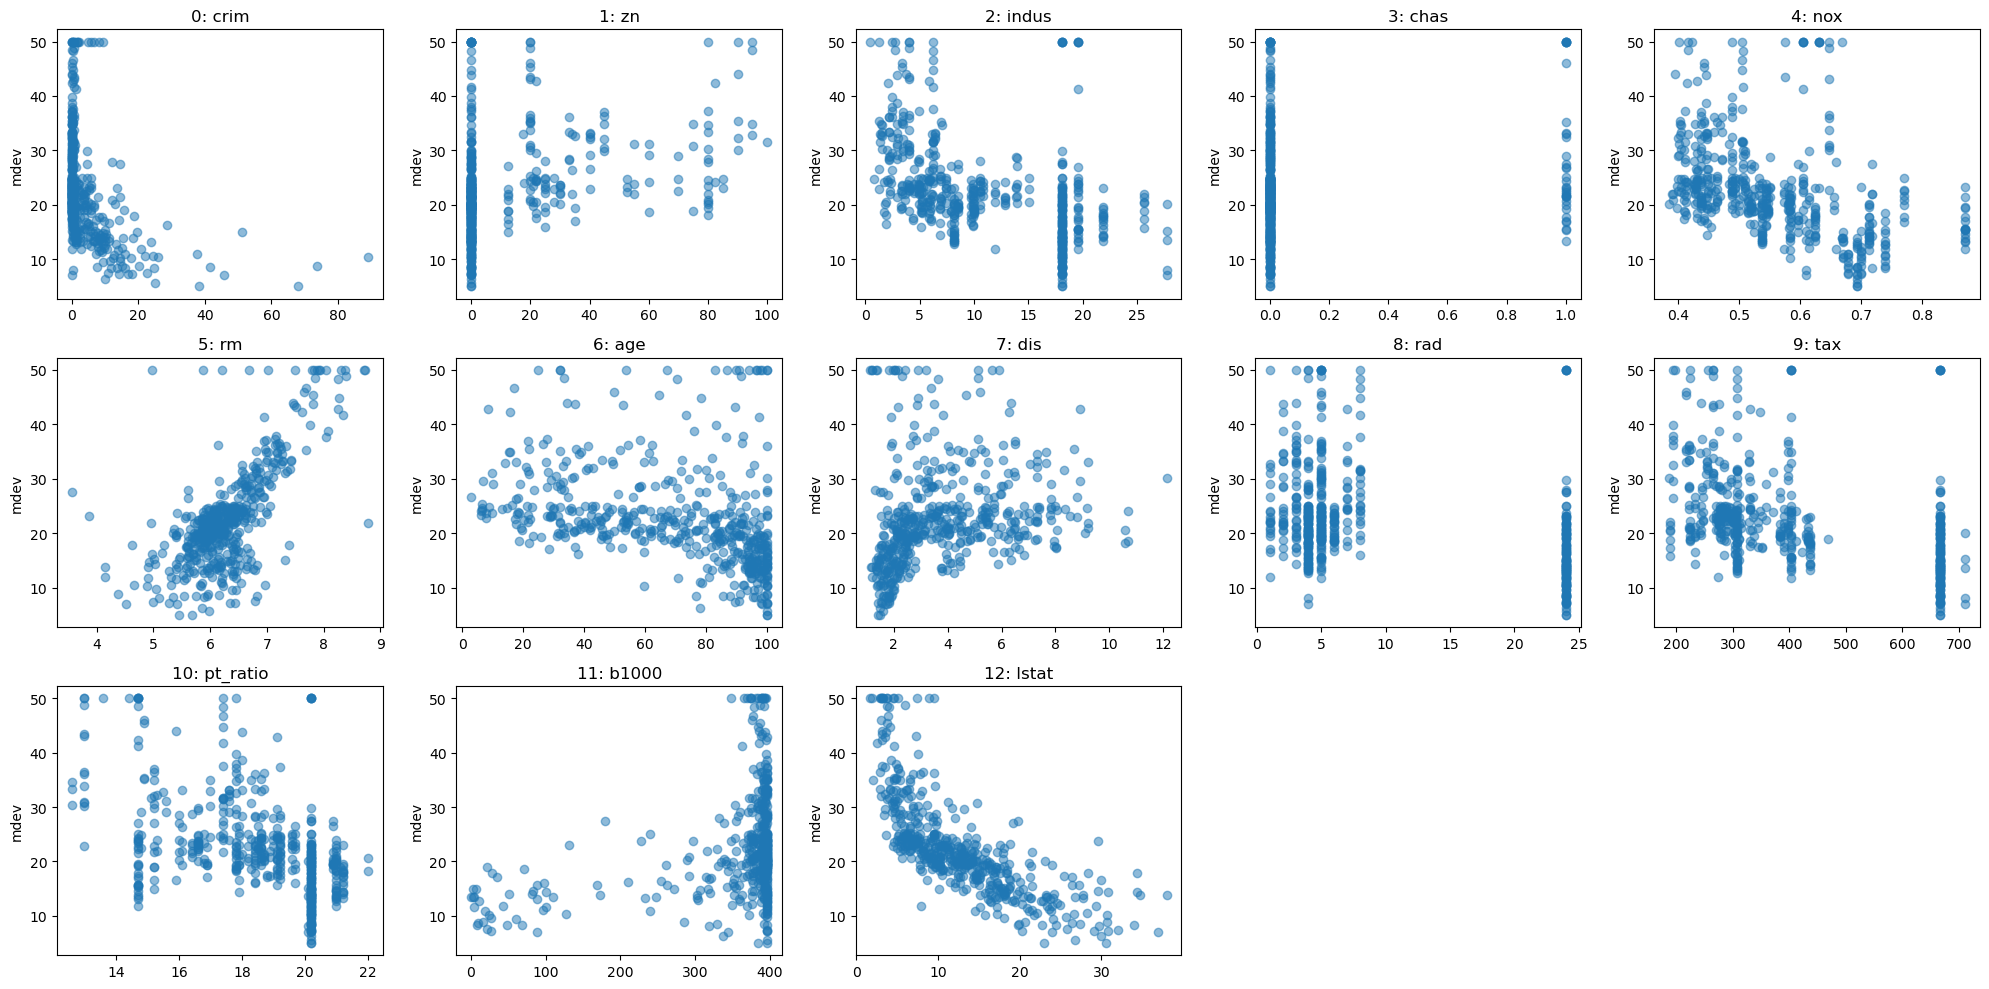

In [46]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.scatter(X.iloc[:, i], y, alpha=.5)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("mdev")
plt.tight_layout()
plt.show()

### Step 3:
Create a box plot of all attributes.

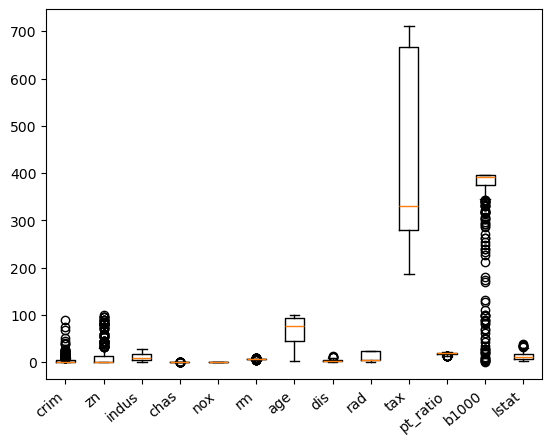

In [55]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1),
           X.columns, rotation=40, ha="right");

### Step 4:
Use `StandardScaler()` to scale the training data set.

In [57]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [63]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print('train data:', knn.score(X_train, y_train), sep = ' ')
print('test data:', knn.score(X_test, y_test), sep = ' ')


train data: 0.7066272660046313
test data: 0.4616380924610112


In [65]:
knn1 = KNeighborsRegressor()
knn1.fit(X_train_scale, y_train)
knn1.score(X_train_scale, y_train)

print('scaled train data:', knn1.score(X_train_scale, y_train), sep = ' ')
print('scaled test data:', knn1.score(scaler.transform(X_test), y_test), sep = ' ')


scaled train data: 0.849576948978109
scaled test data: 0.606952770711171


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=2)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7919211171992375

In [69]:
rf_scale = RandomForestRegressor(n_estimators=100, random_state=2)
rf_scale.fit(X_train_scale, y_train)
rf_scale.score(scaler.transform(X_test), y_test)

0.7915188311034194